In [1]:
import json
import numpy as np

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
root_folder = '/home/lyt/code/vqa-concept'
data_folder = '{}/dataTVQA'.format(root_folder)
fea_folder = '{}/image-feature/bottomup'.format(data_folder)
img_folder = '/home/data/lyt/TextVQA/train_images'
img_folder_test = '/home/data/lyt/TextVQA/test_images'
def low(x): return x.lower()

In [4]:
split_name = 'val'
if split_name == 'test':
    img_folder = img_folder_test
jsdata = json.load(open('{}/TextVQA_0.5_{}.json'.format(data_folder, split_name),'r'))
rawdata = json.load(open('{}/raw-{}.json'.format(data_folder, split_name),'r'))
results = json.load(open('{}/result-conf-ensemble23.json'.format(root_folder)))
print(jsdata.keys())

dict_keys(['dataset_type', 'dataset_name', 'dataset_version', 'data'])


In [5]:
data = jsdata['data']
assert(len(data) == len(rawdata) == len(results))

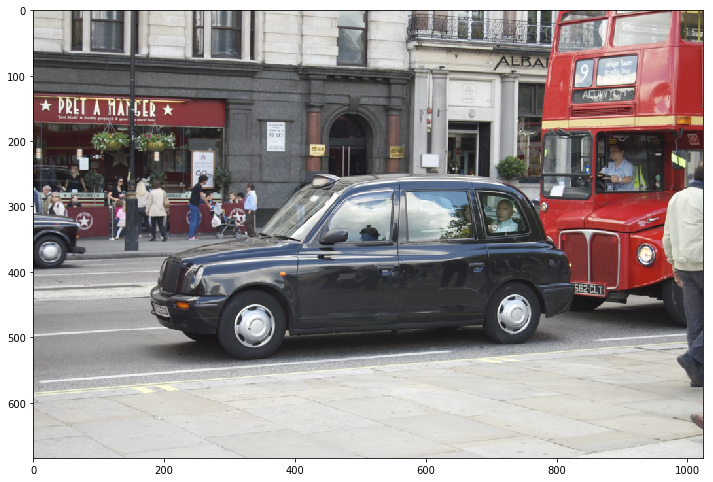

4993
question: what store is seen in the background?
ocr_tokens: ['pret', 'pretamat-cer', 'hat', 'cer', '562clt']
GT answers: [['pret manger', 1.0]]
Pred ans: unanswerable (False)
large img: https://c4.staticflickr.com/5/4092/4979932171_9d3d31df59_z.jpg
larger img: https://c2.staticflickr.com/5/4092/4979932171_ce0b67e596_o.jpg


In [61]:
i = np.random.randint(len(data))
pair = data[i]
rpair = rawdata[i]
res = results[i]
assert(pair['question_id'] == rpair['question_id'] == res['question_id'])
img = imread('{}/{}.jpg'.format(img_folder, pair['image_id']))
fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
plt.show()
print(i)
print('question: {}'.format(pair['question']))
print('ocr_tokens: {}'.format(list(map(low, pair['ocr_tokens']))))
if split_name != 'test':
    print('GT answers: {}'.format(rpair['answers']))
    print('Pred ans: {} ({})'.format(res['answer'], res['answer'] in [gtans[0] for gtans in rpair['answers']]))
else:
    print('Pred ans: {}'.format(res['answer']))
# show larger image link
print('large img: {}'.format(pair['flickr_300k_url']))
print('larger img: {}'.format(pair['flickr_original_url']))